# Cardio Good Fitness Project 


Version Control (for my references): v1.0

## 1. Objective
Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data

### 1.1 Expectations
- Come up with a customer profile (characteristics of a customer) of the different products
- Perform uni-variate and multi-variate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers


### 1.2 Context
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

**Product** - the model no. of the treadmill <br>
**Age** - in no of years, of the customer <br>
**Gender** - of the customer <br>
**Education** - in no. of years, of the customer <br>
**Marital Status** - of the customer <br>
**Usage** - Avg. # times the customer wants to use the treadmill every week <br>
**Fitness** - Self rated fitness score of the customer (5 - very fit, 1 - very unfit) <br>
**Income** - of the customer<br>
**Miles**- expected to run <br>
* Explore the dataset to identify differences between customers of each product. 
* You can also explore relationships between the different attributes of customers. 
* You can approach it from any other line of questioning that you feel could be relevant for the business.



### 1.3 Key questions to be answered
1. Is any products specific to Male / Female customers? (This will allow marketing / advertisements to target them on those products)
2. Is there a relationship between age and the products?
3. Maybe, does income and education correlate? 
4. Does Miles run decide which product is bought? i.e do runners with high mileage favor a specific machine

## 2. Analysis of dataset  

### 2.1 Loading the libraries

In [124]:
import warnings
warnings.filterwarnings('ignore') #ignore those pesky warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### 2.2 Import the dataset

In [33]:
#Load Dataset 
cardio_dataset = pd.read_csv('CardioGoodFitness.csv')

### 2.3 Check the dataset head()

In [34]:
# Exploring the dataset
cardio_dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [35]:
cardio_dataset.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### 2.4 Check the dataset shape()

In [36]:
# Exploring the dataset - length / shape
cardio_dataset.shape

(180, 9)

### 2.5 Check the dataset columns

In [37]:
cardio_dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### 2.6 Check the dataset describe()

In [38]:
cardio_dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


### 2.7 Check dataset info()

In [14]:
# Exploring the dataset - info
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
# Exploring the dataset: This function shows some basic descriptive statistics for all numeric columns
cardio_dataset.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.00000,180,180.00000,180,180.00000,180.00000,180.00000,180.00000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.78889,NaN,15.57222,NaN,3.45556,3.31111,53719.57778,103.19444
std,NaN,6.94350,NaN,1.61705,NaN,1.08480,0.95887,16506.68423,51.86360
min,NaN,18.00000,NaN,12.00000,NaN,2.00000,1.00000,29562.00000,21.00000
25%,NaN,24.00000,NaN,14.00000,NaN,3.00000,3.00000,44058.75000,66.00000
50%,NaN,26.00000,NaN,16.00000,NaN,3.00000,3.00000,50596.50000,94.00000
75%,NaN,33.00000,NaN,16.00000,NaN,4.00000,4.00000,58668.00000,114.75000


## Observations
1. Average age group of customers is 26 yrs with the youngest being 18 and the olders 50
2. It is interesting that most of the customers are Partnered relationshop
3. Average income of customers is ~50K with min 29K and max is 104K. It is quite a big spread of the earning power of the customers base

### 2.8 List / count the datatypes

In [25]:
cardio_dataset.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [26]:
cardio_dataset.dtypes.value_counts()

int64     6
object    3
dtype: int64

## Observations
1. Product, Gender, MaritalStatus are object data type. Note to self to change it to categorical
2. Age, Education, Usage, Fitness, Income, Miles are all int64 type - this is OK



### 2.9 Changing dtypes for object data types to category

In [56]:
# Changing product, gender, marital status for better processing

cardio_dataset.Product = cardio_dataset.Product.astype('category')
cardio_dataset.Gender = cardio_dataset.Gender.astype('category')
cardio_dataset.MaritalStatus = cardio_dataset.MaritalStatus.astype('category')

In [57]:
cardio_dataset.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

### 2.10 Looking at the product statistics

In [39]:
# Desribe the stats with Transpose
cardio_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.00000,28.78889,6.94350,18.00000,24.00000,26.00000,33.00000,50.00000
Education,180.00000,15.57222,1.61705,12.00000,14.00000,16.00000,16.00000,21.00000
Usage,180.00000,3.45556,1.08480,2.00000,3.00000,3.00000,4.00000,7.00000
Fitness,180.00000,3.31111,0.95887,1.00000,3.00000,3.00000,4.00000,5.00000
Income,180.00000,53719.57778,16506.68423,29562.00000,44058.75000,50596.50000,58668.00000,104581.00000
Miles,180.00000,103.19444,51.86360,21.00000,66.00000,94.00000,114.75000,360.00000


In [40]:
# Check the products unique
cardio_dataset['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [41]:
# Check the education years 
cardio_dataset['Education'].value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [42]:
#check the income
cardio_dataset['Income'].value_counts()

45480     14
52302      9
54576      8
53439      8
46617      8
          ..
103336     1
69721      1
75946      1
85906      1
54781      1
Name: Income, Length: 62, dtype: int64

In [43]:
# Describe for each product the describe
cardio_dataset[cardio_dataset['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.00000,28.55000,7.22145,18.00000,23.00000,26.00000,33.00000,50.00000
Education,80.00000,15.03750,1.21638,12.00000,14.00000,16.00000,16.00000,18.00000
Usage,80.00000,3.08750,0.78262,2.00000,3.00000,3.00000,4.00000,5.00000
Fitness,80.00000,2.96250,0.66454,1.00000,3.00000,3.00000,3.00000,5.00000
Income,80.00000,46418.02500,9075.78319,29562.00000,38658.00000,46617.00000,53439.00000,68220.00000
Miles,80.00000,82.78750,28.87410,38.00000,66.00000,85.00000,94.00000,188.00000


In [44]:
# Describe for each product the describe
cardio_dataset[cardio_dataset['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.00000,28.90000,6.64525,19.00000,24.00000,26.00000,33.25000,48.00000
Education,60.00000,15.11667,1.22255,12.00000,14.00000,16.00000,16.00000,18.00000
Usage,60.00000,3.06667,0.79972,2.00000,3.00000,3.00000,3.25000,5.00000
Fitness,60.00000,2.90000,0.62977,1.00000,3.00000,3.00000,3.00000,4.00000
Income,60.00000,48973.65000,8653.98939,31836.00000,44911.50000,49459.50000,53439.00000,67083.00000
Miles,60.00000,87.93333,33.26314,21.00000,64.00000,85.00000,106.00000,212.00000


In [45]:
# Describe for each product the describe
cardio_dataset[cardio_dataset['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.00000,29.10000,6.97174,22.00000,24.75000,27.00000,30.25000,48.00000
Education,40.00000,17.32500,1.63907,14.00000,16.00000,18.00000,18.00000,21.00000
Usage,40.00000,4.77500,0.94699,3.00000,4.00000,5.00000,5.00000,7.00000
Fitness,40.00000,4.62500,0.66747,3.00000,4.00000,5.00000,5.00000,5.00000
Income,40.00000,75441.57500,18505.83672,48556.00000,58204.75000,76568.50000,90886.00000,104581.00000
Miles,40.00000,166.90000,60.06654,80.00000,120.00000,160.00000,200.00000,360.00000


In [46]:
# Describe for each product the describe
cardio_dataset[cardio_dataset['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.00000,28.55000,7.22145,18.00000,23.00000,26.00000,33.00000,50.00000
Education,80.00000,15.03750,1.21638,12.00000,14.00000,16.00000,16.00000,18.00000
Usage,80.00000,3.08750,0.78262,2.00000,3.00000,3.00000,4.00000,5.00000
Fitness,80.00000,2.96250,0.66454,1.00000,3.00000,3.00000,3.00000,5.00000
Income,80.00000,46418.02500,9075.78319,29562.00000,38658.00000,46617.00000,53439.00000,68220.00000
Miles,80.00000,82.78750,28.87410,38.00000,66.00000,85.00000,94.00000,188.00000


## Observation
1. There are only 3 products sold TM195, TM498, TM798. TM195 is the most sold
2. Education median is slighly higher for TM498
3. Income for TM798 customers are highest (mean)
4. Miles on TM798 is highest
5. People on TM798 have a high fitness level
6. All 3 products have median age groups in the 28-29



### 2.9 Checking missing, duplicated values in dataset

In [37]:
cardio_dataset.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [38]:
cardio_dataset.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
cardio_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [8]:
cardio_dataset.duplicated().sum()

0

## Observation
1. The dataset doesn't have any null data
2. The dataset doesn't have duplicated data

In [133]:
# %  Sales for each product
cardio_dataset.groupby(by=['Product']).agg({'Product': 'count'}).div(cardio_dataset['Product'].count()) * 100

,Product
Product,
TM195,44.44444
TM498,33.33333
TM798,22.22222


In [132]:
#%  Sales by Gender
cardio_dataset.groupby(by=['Gender']).agg({'Gender': 'count'}).div(cardio_dataset['Product'].count()) * 100


,Gender
Gender,
Female,42.22222
Male,57.77778


In [134]:
# % sales by MaritalStatus
cardio_dataset.groupby(by=['MaritalStatus']).agg({'MaritalStatus': 'count'}).div(cardio_dataset['Product'].count()) * 100

,MaritalStatus
MaritalStatus,
Partnered,59.44444
Single,40.55556


# Conclusion
- TM195 has highest sales
- Male customers biggest customer base
- Customer has more folks in partnered relationships

# 3 Univariate, Bivariate and graphs

### 3.1 Univariate and graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff20a8a7c10>,
      dtype=object)

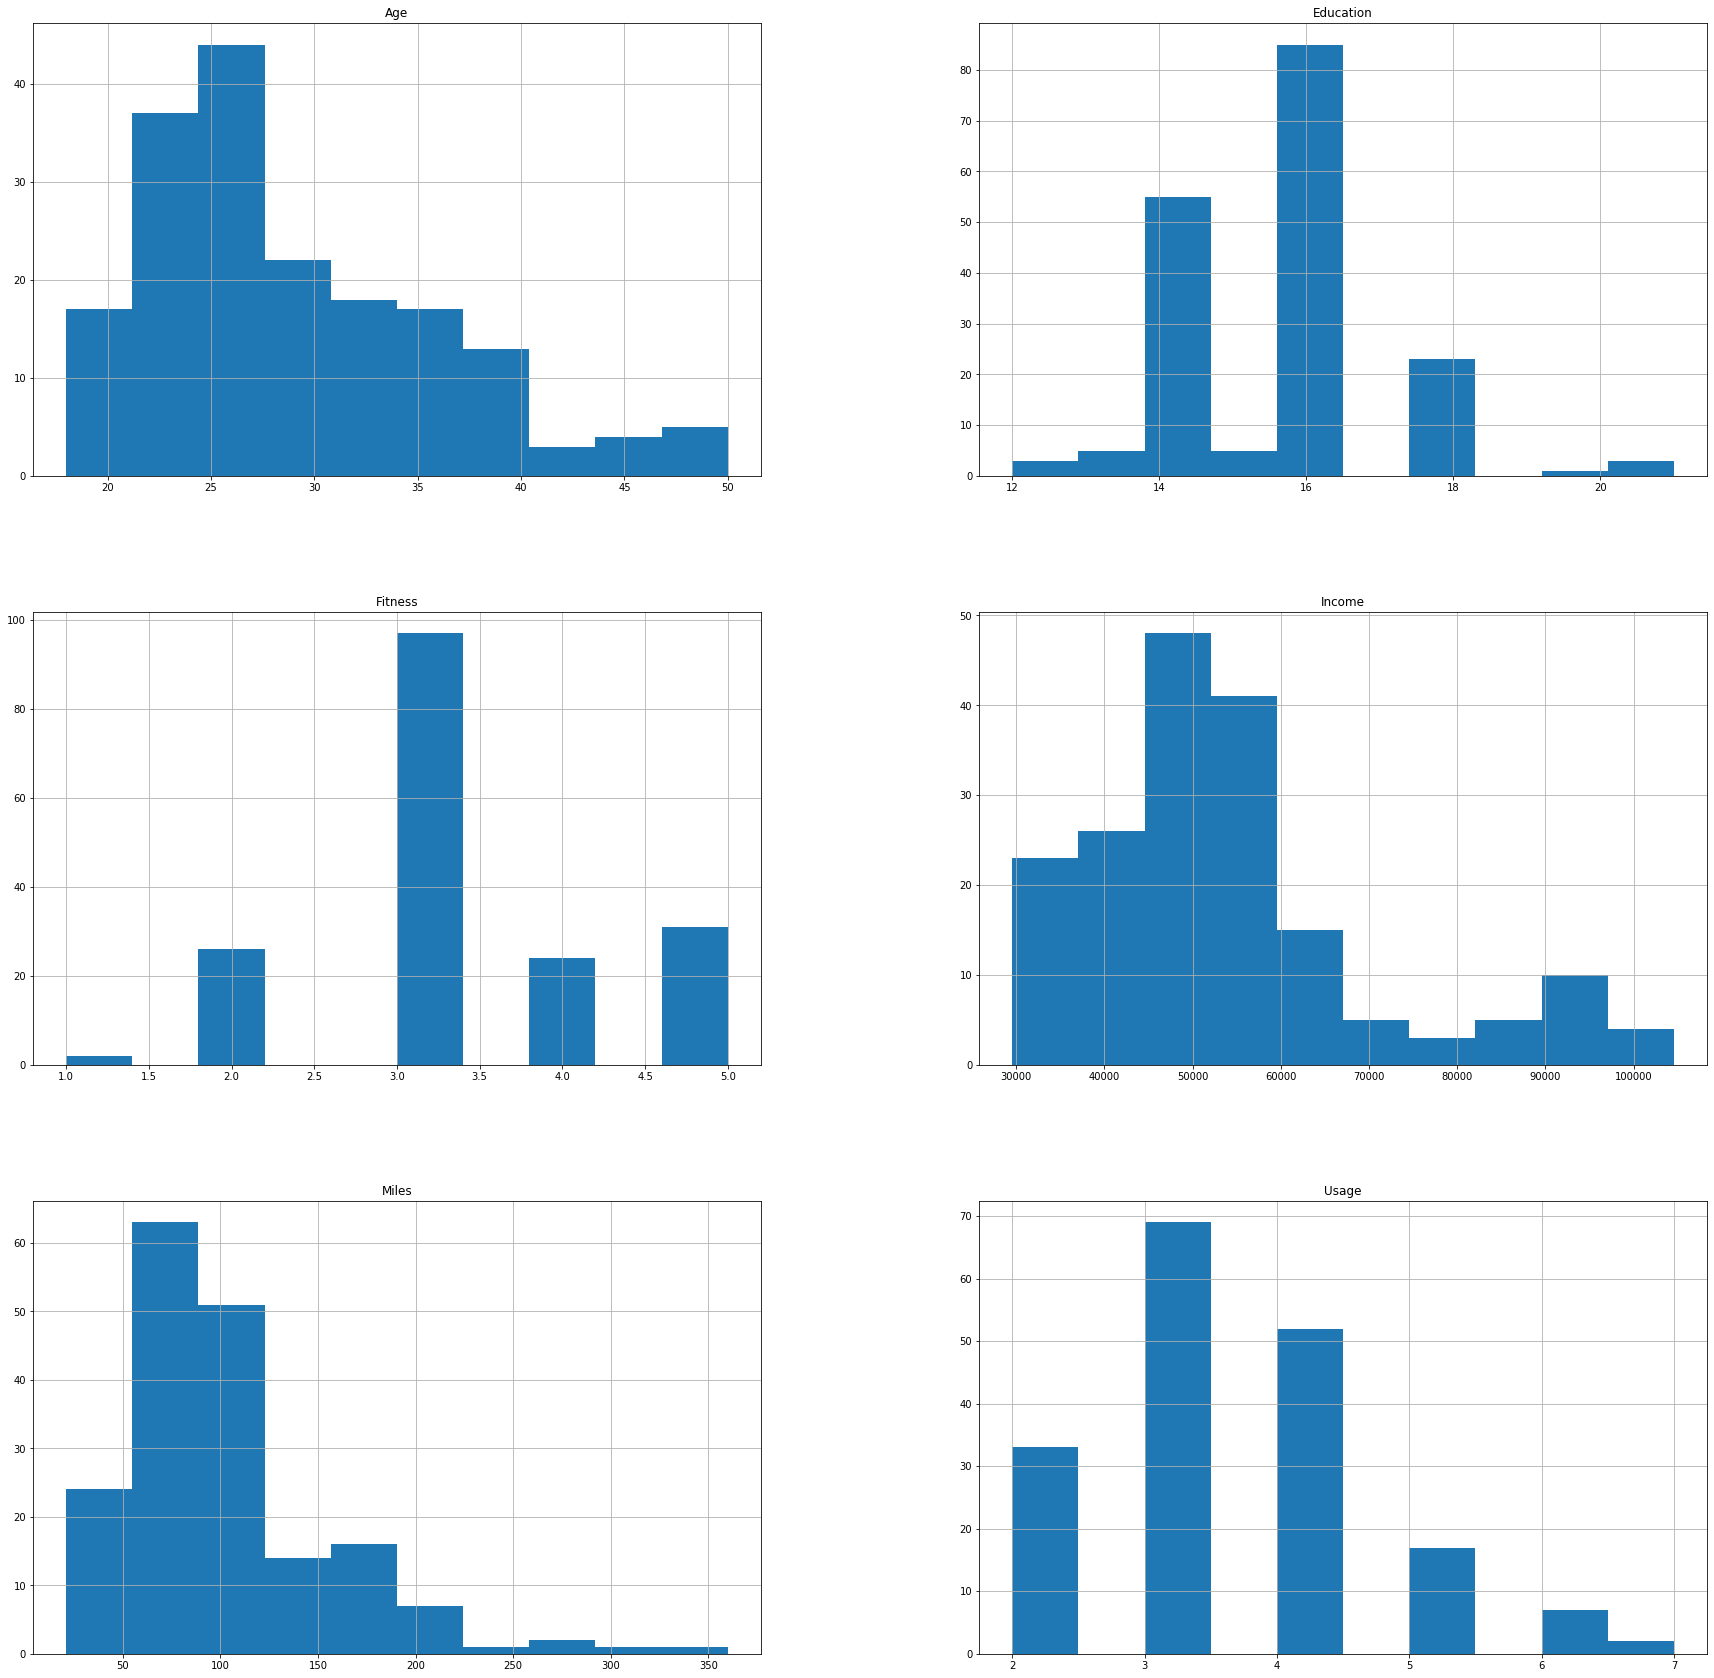

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

cardio_dataset.hist(figsize=(30,30))

### 3.1.1 Univariate analysis on quantitative variables 
Use histplot and boxplot for quantitative variables

<AxesSubplot:xlabel='Age'>

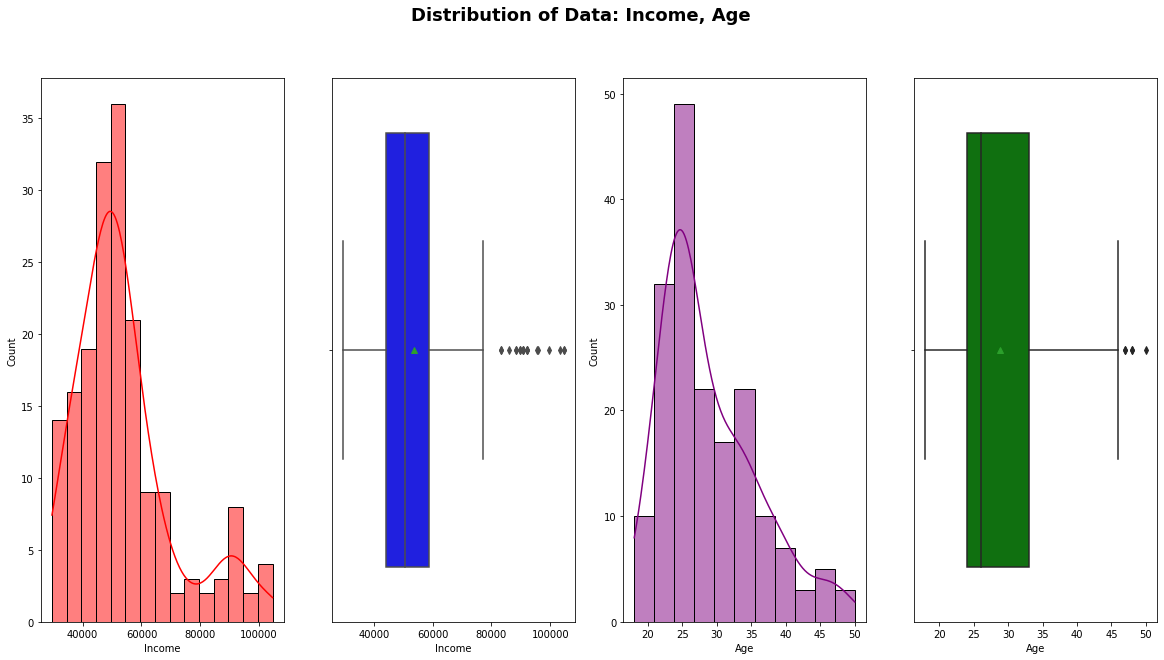

In [83]:
fig, axes =plt.subplots(1,4,figsize=(20, 10))
fig.suptitle("Distribution of Data: "+ 'Income, Age'  , fontsize=18, fontweight='bold')
sns.histplot(data=cardio_dataset, x='Income', kde=True, ax=axes[0], color='red')
sns.boxplot(data=cardio_dataset, x='Income', showmeans=True, ax=axes[1], color='blue')
sns.histplot(data=cardio_dataset, x='Age', kde=True, ax=axes[2], color='purple')
sns.boxplot(data=cardio_dataset, x='Age', showmeans=True, ax=axes[3], color='green')

<AxesSubplot:xlabel='Fitness'>

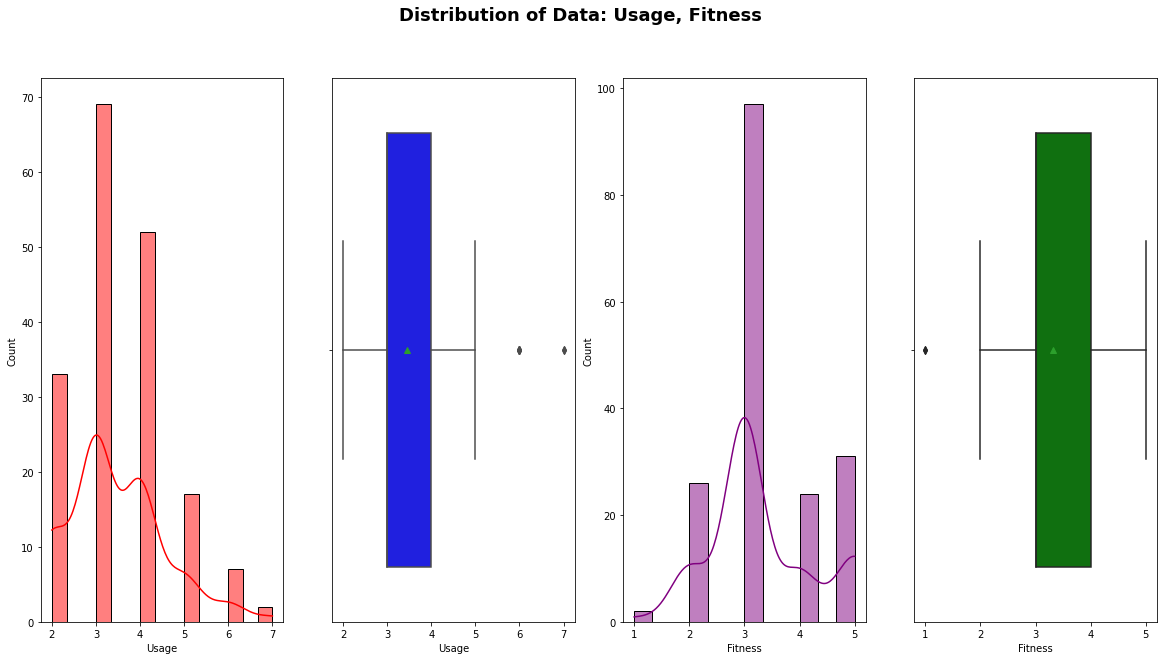

In [84]:
fig, axes =plt.subplots(1,4,figsize=(20, 10))
fig.suptitle("Distribution of Data: "+ 'Usage, Fitness'  , fontsize=18, fontweight='bold')
sns.histplot(data=cardio_dataset, x='Usage', kde=True, ax=axes[0], color='red')
sns.boxplot(data=cardio_dataset, x='Usage', showmeans=True, ax=axes[1], color='blue')
sns.histplot(data=cardio_dataset, x='Fitness', kde=True, ax=axes[2], color='purple')
sns.boxplot(data=cardio_dataset, x='Fitness', showmeans=True, ax=axes[3], color='green')

<AxesSubplot:xlabel='Miles'>

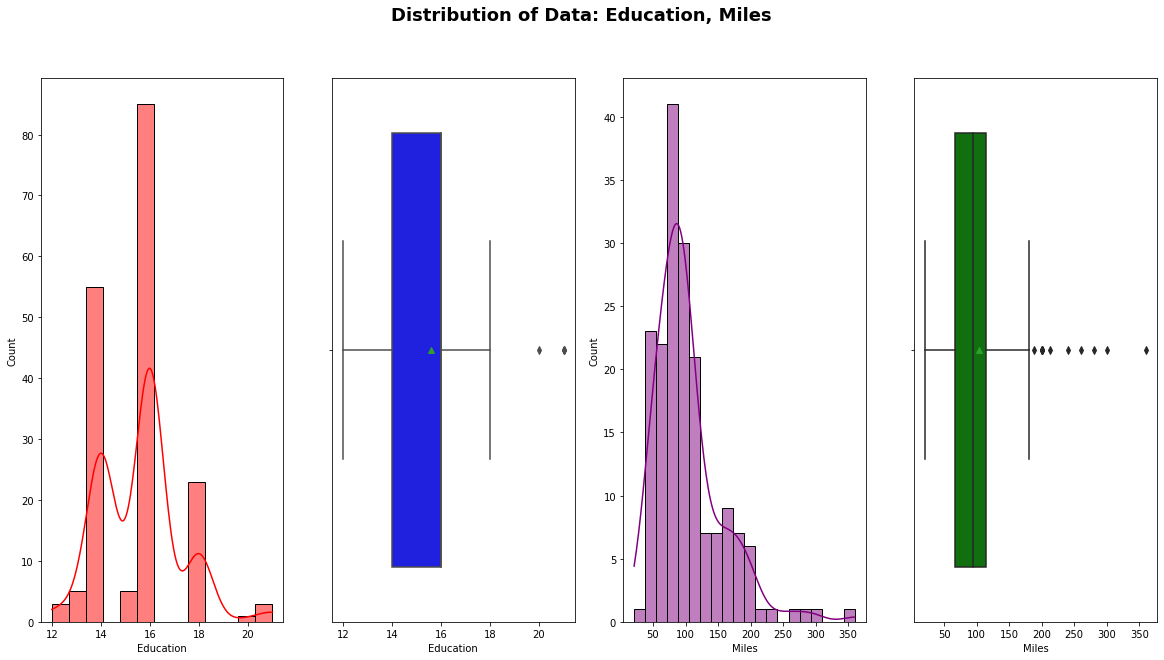

In [86]:
fig, axes =plt.subplots(1,4,figsize=(20, 10))
fig.suptitle("Distribution of Data: "+ 'Education, Miles'  , fontsize=18, fontweight='bold')
sns.histplot(data=cardio_dataset, x='Education', kde=True, ax=axes[0], color='red')
sns.boxplot(data=cardio_dataset, x='Education', showmeans=True, ax=axes[1], color='blue')
sns.histplot(data=cardio_dataset, x='Miles', kde=True, ax=axes[2], color='purple')
sns.boxplot(data=cardio_dataset, x='Miles', showmeans=True, ax=axes[3], color='green')

In [82]:
#Skewness ratio
cardio_dataset.skew()

Age         0.98216
Education   0.62229
Usage       0.73949
Fitness     0.45480
Income      1.29178
Miles       1.72450
dtype: float64

# Conclusion
This confirms what we saw earlier in when looking at the info() and describe of the dataset
- Average age of customer is 25, data is right skewed for age
- Average income of customer is 50K and is also right skewed
- Average usage is 3 hours data is right skewed
- Average Fitness is 3 is more centrally distributed with slight left skewness
- Average Education is centrally distributed about 16 years (undergrad)
- Average Miles run is left skewed with 100 miles. There are quite a few outliers beyond 200 miles

## 3.1.1 Univariate analysis on qualitative variables 

In [88]:
# Use countplot for qualitative as per the course

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

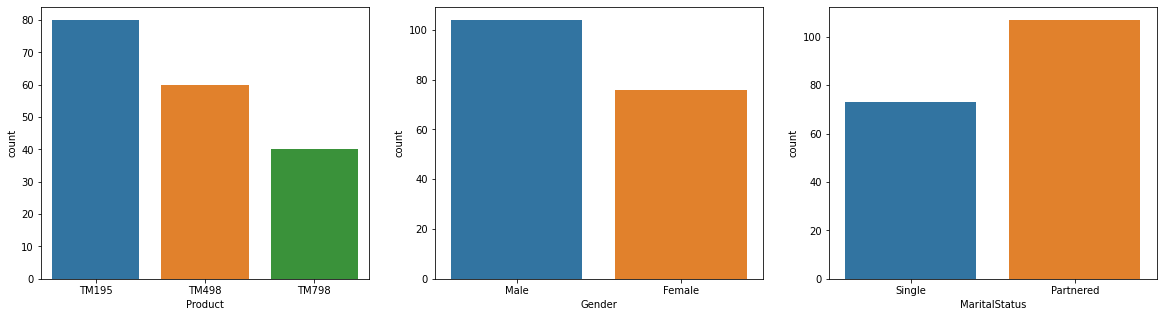

In [103]:
fig,axes =plt.subplots(1,3,figsize=(20, 5))
sns.countplot(data=cardio_dataset, x='Product', ax=axes[0])
sns.countplot(data=cardio_dataset, x='Gender', ax=axes[1])
sns.countplot(data=cardio_dataset, x='MaritalStatus', ax=axes[2])


# Conclusion
- TM195 most sold product
- Male are the biggest customer
- Marital status are mostly in partnered relationship

## 3.2 Bivariate and graphs

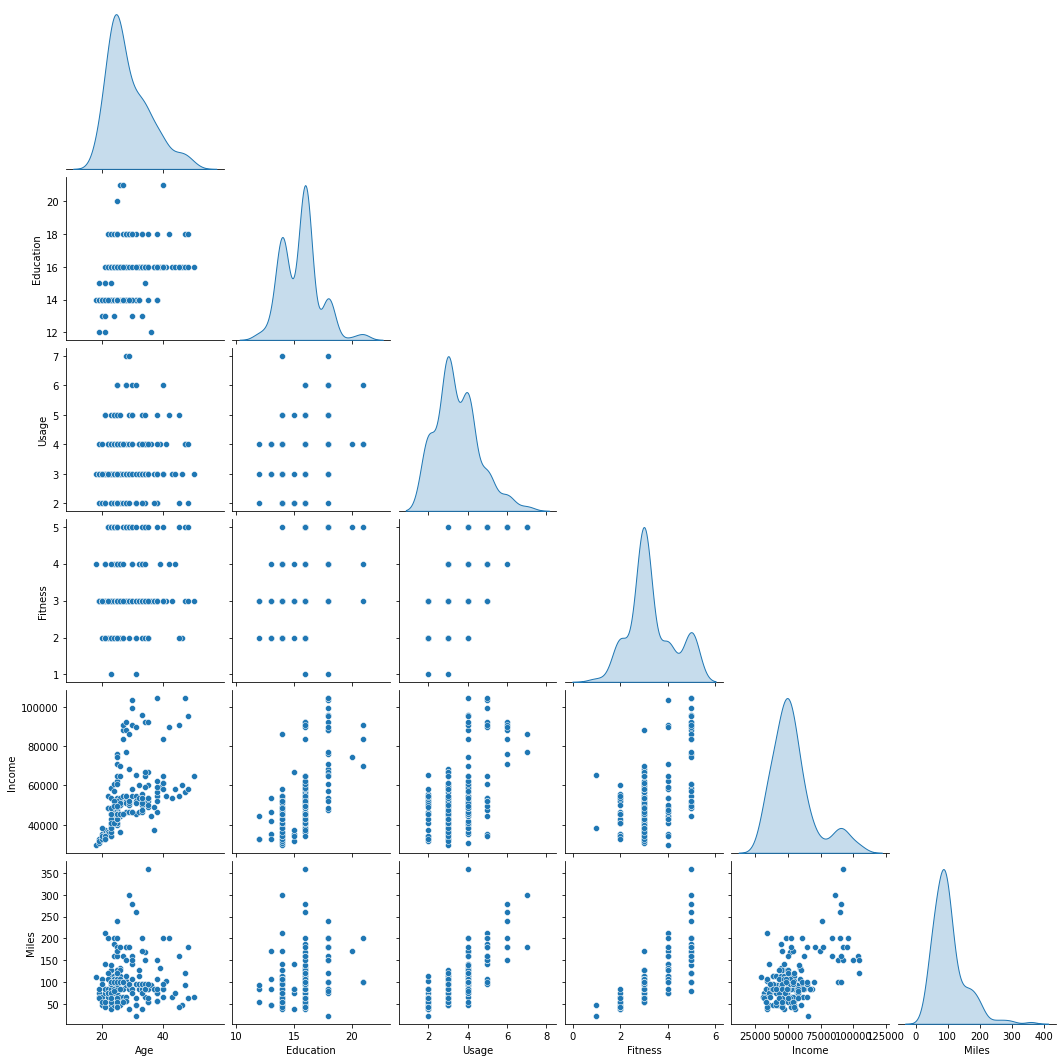

In [107]:
sns.pairplot(cardio_dataset, diag_kind='kde', corner=True)

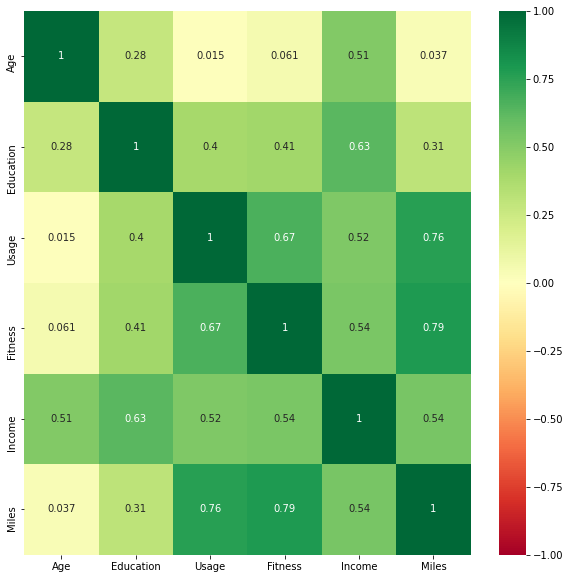

In [118]:
# Heatmap to correlate 
plt.figure(figsize=(10,10))
sns.heatmap(cardio_dataset.corr(), annot=True, cmap='RdYlGn', vmin = -1, vmax = 1);

# Observation
- High correlation between fitness and miles
- High correlation between usage and miles
- Very low correlation between age,miles and usage, age,

<Figure size 720x720 with 0 Axes>

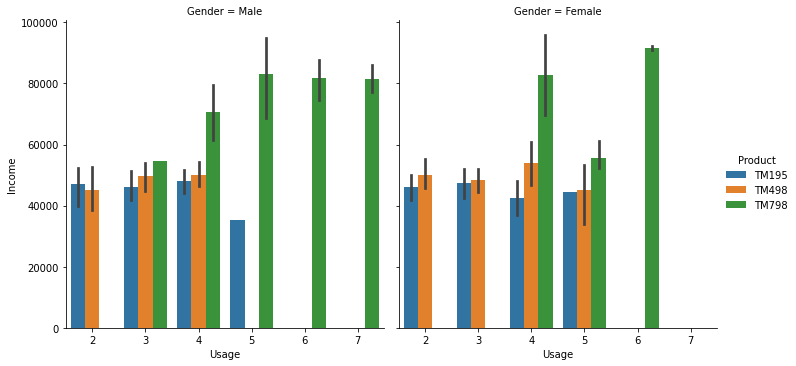

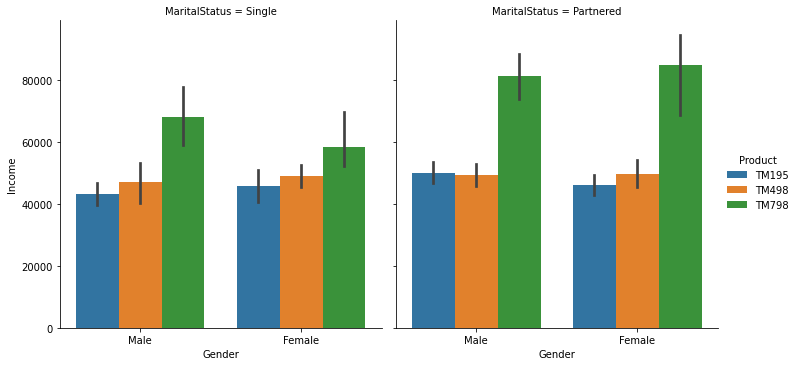

In [117]:
#use catplot to analyze quantitative data
plt.figure(figsize=(10,10))
sns.catplot(data=cardio_dataset, x='Usage', y='Income', hue='Product', col='Gender', kind="bar")
sns.catplot(data=cardio_dataset, x='Gender', y='Income', hue='Product', col='MaritalStatus', kind="bar")

# Observation
- Female, Male high income earners prefer TM798
- Partnered relationship prefer with income prefer TM798, (as well as Male / Female Single)

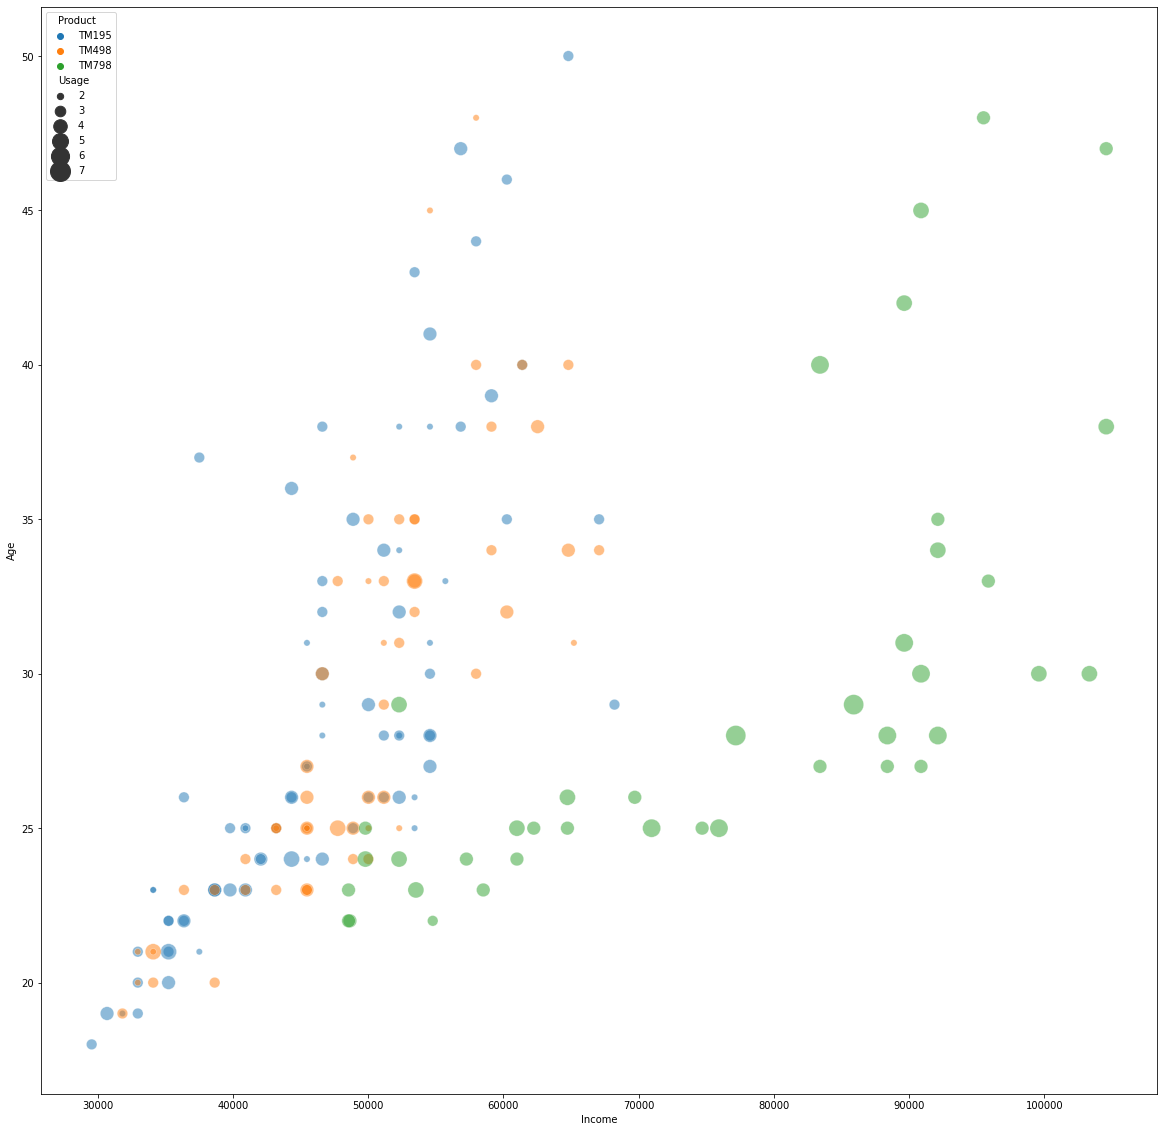

In [126]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=cardio_dataset, x='Income', y='Age', hue='Product', size='Usage', alpha=0.5, sizes=(40,400));

# Observation
- High income people by TM798
- Low/Middle income people by TM195 TM498
- folks with usage buy TM798

# 4. Final summary and conclusions

1) Product TM798
- 22% sale 
- High income folks
- Very fit, high usage
- Age group median but a few outliers 
- Customer base education is 16 - 18yrs (highly educated)
- Very popular among males

2) Product TM195
- Best selling product - 44% sale
- Customer base is is lower income 
- Customer usage is around 3 
- Customer base education is 14-16 years
- Equally liked by male and female
- Usage is on the low side


3) Product TM498
- 33% sale
- Low - medium income level
- Casual usage and medium fitness level
- Customer base education is 14-16 years
- Equally liked by male and female
- Usage is on the low side

# Appendix (for myself for later use)
1. if I added ; at end of line it removes warnings
2. Autocompletes not working - need magic %config Completer.use_jedi = False
(ref https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working)